Center: (0.0323953, -0.0112916)
Radius: 1.26443


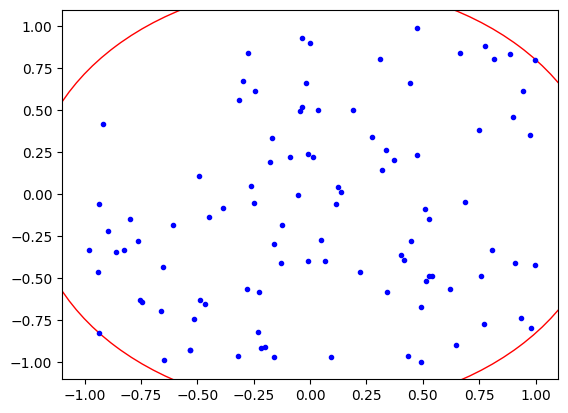

In [2]:
import random
import math, random
import matplotlib.pyplot as plt
import numpy as np

def make_circle(points):
	# Convert to float and randomize order
	shuffled = [(float(x), float(y)) for (x, y) in points]
	random.shuffle(shuffled)
	
	# Progressively add points to circle or recompute circle
	c = None
	for (i, p) in enumerate(shuffled):
		if c is None or not is_in_circle(c, p):
			c = _make_circle_one_point(shuffled[ : i + 1], p)
	return c


# One boundary point known
def _make_circle_one_point(points, p):
	c = (p[0], p[1], 0.0)
	for (i, q) in enumerate(points):
		if not is_in_circle(c, q):
			if c[2] == 0.0:
				c = make_diameter(p, q)
			else:
				c = _make_circle_two_points(points[ : i + 1], p, q)
	return c


# Two boundary points known
def _make_circle_two_points(points, p, q):
	circ = make_diameter(p, q)
	left  = None
	right = None
	px, py = p
	qx, qy = q
	
	# For each point not in the two-point circle
	for r in points:
		if is_in_circle(circ, r):
			continue
		
		# Form a circumcircle and classify it on left or right side
		cross = _cross_product(px, py, qx, qy, r[0], r[1])
		c = make_circumcircle(p, q, r)
		if c is None:
			continue
		elif cross > 0.0 and (left is None or _cross_product(px, py, qx, qy, c[0], c[1]) > _cross_product(px, py, qx, qy, left[0], left[1])):
			left = c
		elif cross < 0.0 and (right is None or _cross_product(px, py, qx, qy, c[0], c[1]) < _cross_product(px, py, qx, qy, right[0], right[1])):
			right = c
	
	# Select which circle to return
	if left is None and right is None:
		return circ
	elif left is None:
		return right
	elif right is None:
		return left
	else:
		return left if (left[2] <= right[2]) else right


def make_diameter(a, b):
	cx = (a[0] + b[0]) / 2
	cy = (a[1] + b[1]) / 2
	r0 = math.hypot(cx - a[0], cy - a[1])
	r1 = math.hypot(cx - b[0], cy - b[1])
	return (cx, cy, max(r0, r1))


def make_circumcircle(a, b, c):
	# Mathematical algorithm from Wikipedia: Circumscribed circle
	ox = (min(a[0], b[0], c[0]) + max(a[0], b[0], c[0])) / 2
	oy = (min(a[1], b[1], c[1]) + max(a[1], b[1], c[1])) / 2
	ax = a[0] - ox;  ay = a[1] - oy
	bx = b[0] - ox;  by = b[1] - oy
	cx = c[0] - ox;  cy = c[1] - oy
	d = (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by)) * 2.0
	if d == 0.0:
		return None
	x = ox + ((ax*ax + ay*ay) * (by - cy) + (bx*bx + by*by) * (cy - ay) + (cx*cx + cy*cy) * (ay - by)) / d
	y = oy + ((ax*ax + ay*ay) * (cx - bx) + (bx*bx + by*by) * (ax - cx) + (cx*cx + cy*cy) * (bx - ax)) / d
	ra = math.hypot(x - a[0], y - a[1])
	rb = math.hypot(x - b[0], y - b[1])
	rc = math.hypot(x - c[0], y - c[1])
	return (x, y, max(ra, rb, rc))


_MULTIPLICATIVE_EPSILON = 1 + 1e-14

def is_in_circle(c, p):
	return c is not None and math.hypot(p[0] - c[0], p[1] - c[1]) <= c[2] * _MULTIPLICATIVE_EPSILON


# Returns twice the signed area of the triangle defined by (x0, y0), (x1, y1), (x2, y2).
def _cross_product(x0, y0, x1, y1, x2, y2):
	return (x1 - x0) * (y2 - y0) - (y1 - y0) * (x2 - x0)

# Example of usage
generate_points = lambda n: [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(n)]
points = generate_points(100)
cx, cy, r = make_circle(points)
print("Center: (%g, %g)\nRadius: %g" % (cx, cy, r))

# Plot the results
fig, ax = plt.subplots()
ax.set_xlim((-1.1, 1.1))
ax.set_ylim((-1.1, 1.1))
ax.add_artist(plt.Circle((cx, cy), r, color='r', fill=False))
ax.plot([x for (x, y) in points], [y for (x, y) in points], 'b.')
plt.show()


Center: (0.123722, -0.012012)
Radius: 1.30225


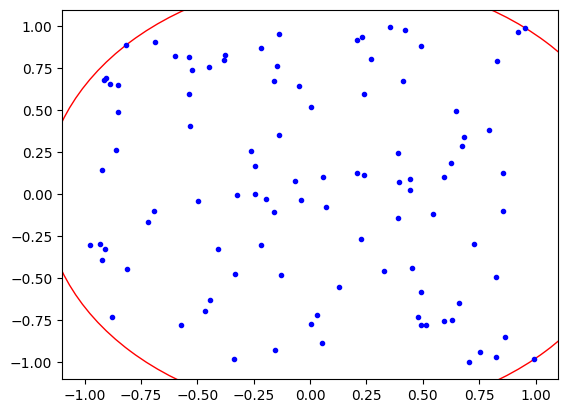

In [3]:
# naive algorithm to find the smallest circle that encloses a set of points
# by returning the smallest circle enclosing all the points in the set
def naive_circle(points):
    # shuffle the points
    shuffled = [(float(x), float(y)) for (x, y) in points]
    random.shuffle(shuffled)
    
    # compute the smallest circle that encloses the first point
    c = (shuffled[0][0], shuffled[0][1], 0.0)
    
    # for each point in the set
    for (i, p) in enumerate(shuffled):
        # if the point is not in the circle
        if not is_in_circle(c, p):
            # compute the smallest circle that encloses the first i+1 points
            c = _make_circle_one_point(shuffled[ : i + 1], p)
    
    # return the smallest circle that encloses all the points
    return c

# Example of usage
generate_points = lambda n: [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(n)]
points = generate_points(100)
cx, cy, r = naive_circle(points)
print("Center: (%g, %g)\nRadius: %g" % (cx, cy, r))

# Plot the results
fig, ax = plt.subplots()
ax.set_xlim((-1.1, 1.1))
ax.set_ylim((-1.1, 1.1))
ax.add_artist(plt.Circle((cx, cy), r, color='r', fill=False))
ax.plot([x for (x, y) in points], [y for (x, y) in points], 'b.')
plt.show()


In [4]:
# Compare the two algorithms
import timeit

def compare(algo):
    start = timeit.default_timer()
    cx, cy, r = algo(points)
    stop = timeit.default_timer()

    return (cx, cy, r, stop - start)

print("Naive algorithm: (%g, %g) r = %g, time = %g" % compare(naive_circle))
print("Welzl's algorithm: (%g, %g) r = %g, time = %g" % compare(make_circle))

Naive algorithm: (0.123722, -0.012012) r = 1.30225, time = 0.0054636
Welzl's algorithm: (0.123722, -0.012012) r = 1.30225, time = 0.0024444


{'naive': 9.782394899966675, 'welzl': 9.509268699946915}
In average, the naive algorithm is 1.02872 times slower than Welzl's algorithm


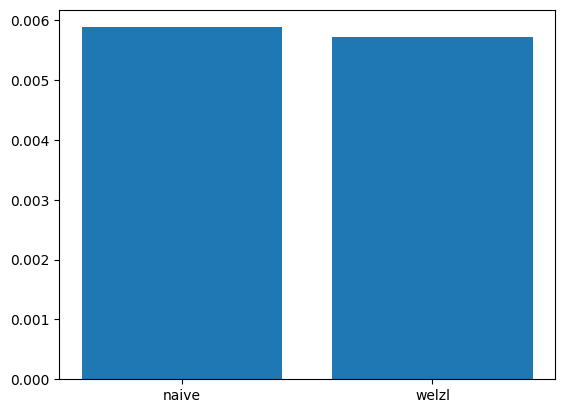

In [9]:
import os
# list all points in each file in samples/
data = {}
for filename in os.listdir('samples'):
    with open('samples/' + filename) as f:
        points = [tuple(map(float, line.split())) for line in f]
        # compare the two algorithms
        results = {}
        results['naive'] = compare(naive_circle)
        results['welzl'] = compare(make_circle)
        data[filename] = results


total_times = {}
# compute the total time for each algorithm
for filename in data:
    t = data[filename]
    for algo in t:
        if algo not in total_times:
            total_times[algo] = 0
        total_times[algo] += t[algo][3]

print(total_times)

# compute the average time for each algorithm
for algo in total_times:
    total_times[algo] /= len(data)

print("In average, the naive algorithm is %g times slower than Welzl's algorithm" % (total_times['naive'] / total_times['welzl']))

# plot the average time for each algorithm
plt.bar(range(len(total_times)), total_times.values(), align='center')
plt.xticks(range(len(total_times)), total_times.keys())
plt.show()

